In [545]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sklearn.feature_selection as feature_selection
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

#### Load dataset

In [546]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [547]:
df.describe(include='all') #no missing values

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [549]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [550]:
col=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']
df[col]= df[col].astype('category')

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.9+ KB


In [552]:
df.shape

(731, 16)

In [553]:
 df.nunique() #to find number of categorical and numeric data

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [554]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- season, year, holiday, weekday, working day and weathersit categorical


In [555]:
df['dteday'].value_counts()

2012-04-30    1
2012-12-23    1
2011-11-17    1
2012-08-01    1
2011-12-24    1
             ..
2011-08-30    1
2012-09-16    1
2011-12-19    1
2011-09-11    1
2011-08-27    1
Name: dteday, Length: 731, dtype: int64

In [556]:
df=df.drop(columns=['instant','dteday','yr'])

In [557]:
df

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### Unique values, of less significance,, so removing it and instant (just the serial numbers)

In [558]:
df['weathersit'].value_counts()


1    463
2    247
3     21
Name: weathersit, dtype: int64

In [560]:
import warnings
warnings.filterwarnings('ignore')

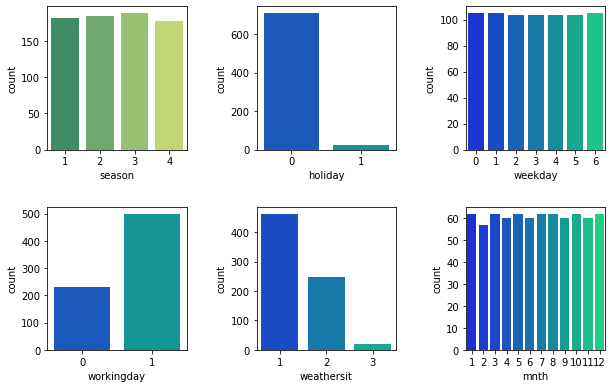

In [561]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.countplot(df["season"],palette="summer")


plt.subplot(3,3,2)
sns.countplot(df["holiday"],palette="winter")

plt.subplot(3,3,3)
sns.countplot(df["weekday"],palette="winter")

plt.subplot(3,3,4)
sns.countplot(df["workingday"],palette="winter")
plt.subplot(3,3,5)
sns.countplot(df["weathersit"],palette="winter")

plt.subplot(3,3,6)
sns.countplot(df["mnth"],palette="winter")

plt.subplots_adjust(hspace=0.4,wspace=0.5)

-day, month , year or even seasonal changes has no much differences , equal bike sharing usages 
bikes are used less during working days(not on holidays) and it depends majorly on the weather as well.

Text(0.5, 1.0, 'Count of bikes during different months')

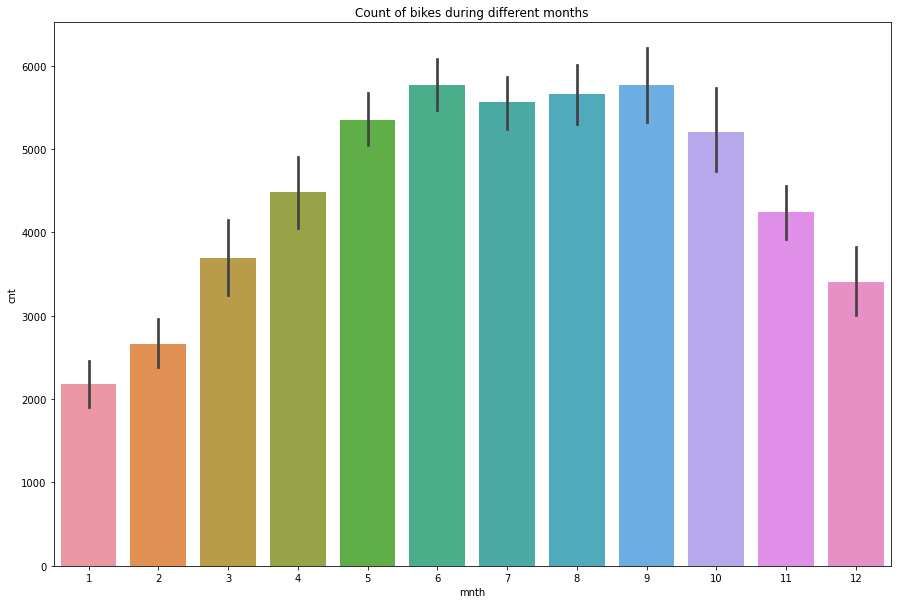

In [562]:
plt.subplots(figsize=(15,10))
sns.barplot(data=df, x='mnth',y='cnt')
plt.title('Count of bikes during different months')

Text(0.5, 1.0, 'Count of bikes during different days')

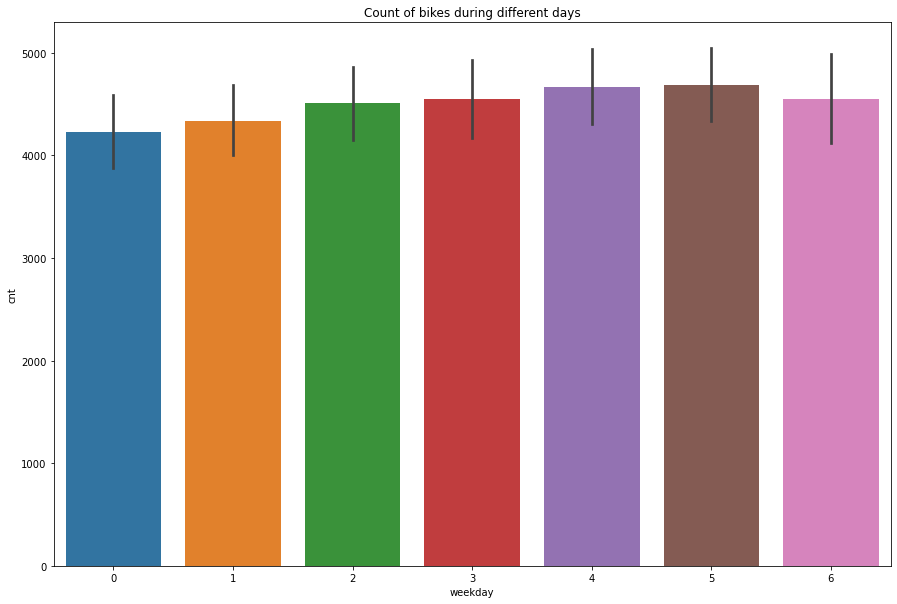

In [563]:
plt.subplots(figsize=(15,10))
sns.barplot(data=df, x='weekday',y='cnt')
plt.title('Count of bikes during different days')

-almost equal number of vehicles on all days

- bike sharing has huge dependence on time of the year..


<AxesSubplot:>

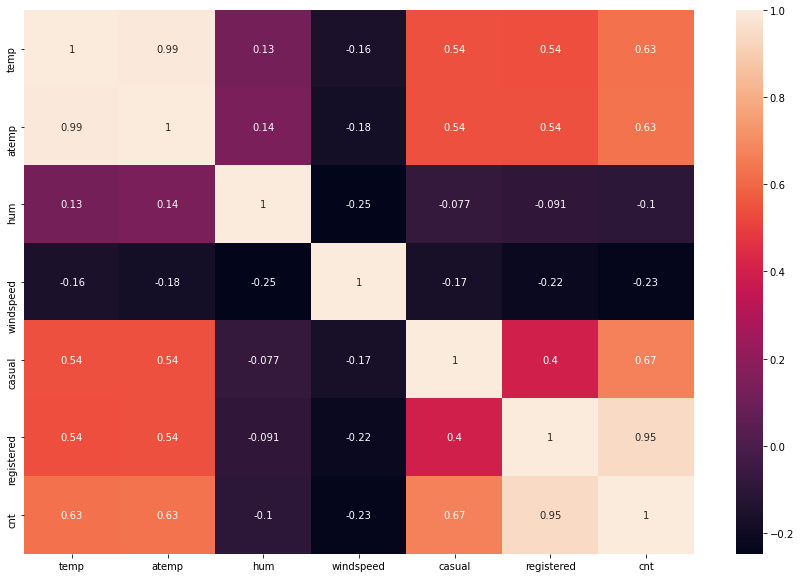

In [564]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True) #for numerical attributes

- atemp and temp are highly correlated and same with registered and cnt
-casual + registered = count
-windspeed is also having low significance

Text(0.5, 1.0, 'humidity vs total count')

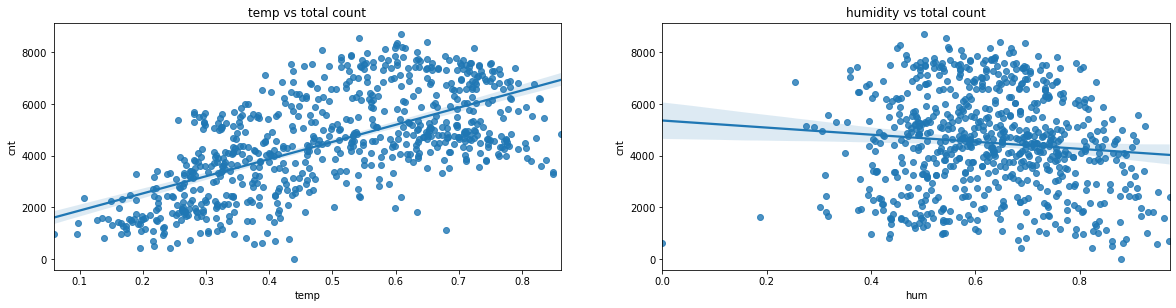

In [565]:
plt.figure(figsize=(20,10))
#sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed',
       #'casual', 'registered'],y_vars="cnt",data=df)
plt.subplot(2,2,1)
sns.regplot(x=df['temp'],y=df["cnt"])
plt.title('temp vs total count')
plt.subplot(2,2,2)
sns.regplot(x=df['hum'],y=df['cnt'])
plt.title('humidity vs total count')

<AxesSubplot:xlabel='cnt', ylabel='Density'>

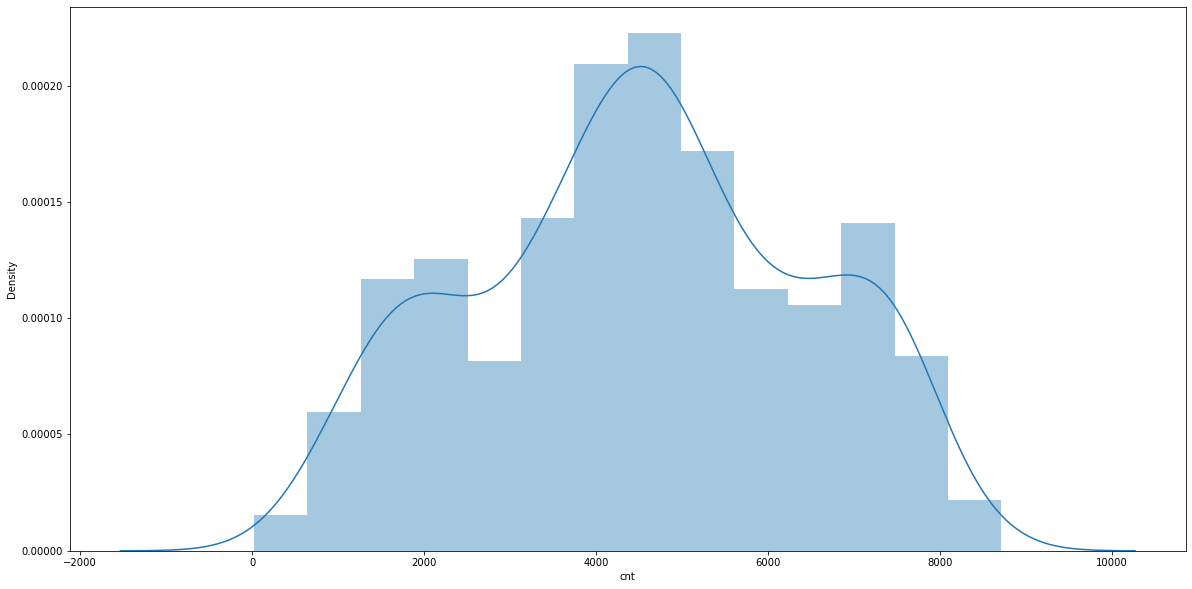

In [566]:
plt.figure(figsize=(20,10))

sns.distplot(df['cnt'])

<AxesSubplot:xlabel='cnt', ylabel='Density'>

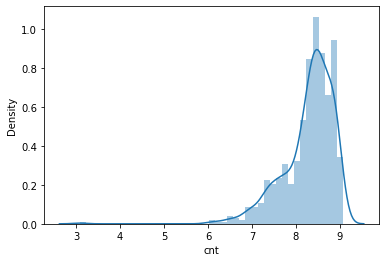

In [609]:
sns.distplot(np.log(df.cnt))


- left skewd distribution upon normalisation

-DUMMIES

In [567]:
df=pd.get_dummies(df, drop_first=True)
df

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0,0,0,...,0,0,0,0,1,0,0,1,1,0
727,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0,0,0,...,0,0,0,0,0,1,0,1,1,0
728,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0,0,0,...,0,0,0,0,0,0,1,0,1,0
729,0.255833,0.231700,0.483333,0.350754,364,1432,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [568]:
X=df.drop(columns=['atemp','windspeed','casual','registered','cnt'],axis = 1)
y= df['cnt']

In [569]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(X.values, 0) 
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by='VIF_Factor', ascending=False)
vif

,VIF_Factor,features
0,52.048823,temp
1,23.219976,hum
2,9.979727,season_2
3,14.342350,season_3
4,9.731534,season_4
5,1.809790,mnth_2
6,2.740726,mnth_3
7,6.086493,mnth_4
8,7.448554,mnth_5
9,7.952476,mnth_6


-Coefficient of variation

In [570]:
cov = df.apply(lambda x: (x.std()/x.mean()))
cov.sort_values(ascending = False, inplace = True)
cov

weathersit_3    5.818577
holiday_1       5.818577
mnth_2          3.441040
mnth_6          3.346439
mnth_9          3.346439
mnth_11         3.346439
mnth_4          3.346439
mnth_3          3.287112
mnth_5          3.287112
mnth_8          3.287112
mnth_10         3.287112
mnth_7          3.287112
mnth_12         3.287112
weekday_2       2.457052
weekday_3       2.457052
weekday_4       2.457052
weekday_5       2.457052
weekday_6       2.443373
weekday_1       2.443373
season_4        1.763802
season_2        1.725369
season_3        1.700663
weathersit_2    1.400785
casual          0.809528
workingday_1    0.680171
cnt             0.430076
registered      0.426746
windspeed       0.406842
temp            0.369513
atemp           0.343543
hum             0.226836
dtype: float64

In [571]:
cov.loc[cov < 0.05]

Series([], dtype: float64)

#### Linear regression -Target variable contionuous

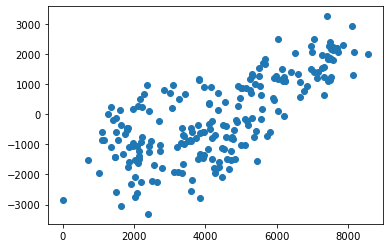

In [574]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Create training and test sets
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

error= y_test- y_pred
fig,ax= plt.subplots()
ax.scatter(y_test,error)
plt.show()

In [575]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5157541969990411
Root Mean Squared Error: 1388.0913597463264


#### Random Forest

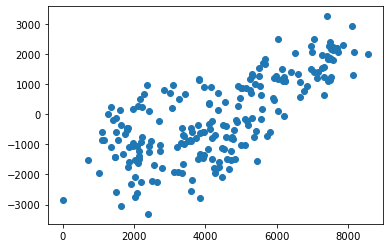

In [576]:
# Create the regressor: reg_all
reg_rfr = RandomForestRegressor()

# Fit the regressor to the training data
reg_rfr.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

error= y_test- y_pred
fig,ax= plt.subplots()
ax.scatter(y_test,error)
plt.show()

In [597]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_rfr.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5858370075502481
Root Mean Squared Error: 1388.0913597463264


In [578]:
df

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0,0,0,...,0,0,0,0,1,0,0,1,1,0
727,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0,0,0,...,0,0,0,0,0,1,0,1,1,0
728,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0,0,0,...,0,0,0,0,0,0,1,0,1,0
729,0.255833,0.231700,0.483333,0.350754,364,1432,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### ORDINARY LEAST SQUARES

In [604]:
formula= ' cnt ~'  + '+'.join(X.columns)
formula

' cnt ~temp+hum+season_2+season_3+season_4+mnth_2+mnth_3+mnth_4+mnth_5+mnth_6+mnth_7+mnth_8+mnth_9+mnth_10+mnth_11+mnth_12+holiday_1+weekday_1+weekday_2+weekday_3+weekday_4+weekday_5+weekday_6+workingday_1+weathersit_2+weathersit_3'

In [605]:
model = smf.ols(formula,df)


In [606]:
model_output = model.fit()

In [607]:
print(model_output.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     37.65
Date:                Wed, 23 Jun 2021   Prob (F-statistic):          4.29e-112
Time:                        14:36:57   Log-Likelihood:                -6259.7
No. Observations:                 731   AIC:                         1.257e+04
Df Residuals:                     705   BIC:                         1.269e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1960.2855    328.741      5.963   

#### Inferences 
-r-squared value is greater than adjusted r squared.
prob (f-statistic ) less than 0.05 model is having good accuracy.
-pvalue <0,05 have more importance than other variables with more than 0,05 p values.
-t test values  , higher the value, higher is the importance for the model. here temp(9.613) and weathersit_3(-7.298) has much usage.others below a certain limit could be neglected.

#### Temperature has greatly influenced people from selecting bike sharing 